In [1]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import sys
sys.path.append("../../../")

import numpy as np
SPEED_LIMIT = np.pi/2

In [18]:
# #test to see expected costs of fractional B gates
# from src.utils.custom_gates import CustomCostGate
# from src.hamiltonian import ConversionGainHamiltonian
# from src.utils.polytope_wrap import gate_set_to_haar_expectation
# import numpy as np
# h = ConversionGainHamiltonian()
# for d in range(1,5):
#     u = h._construct_U_lambda(3*np.pi/8, np.pi/8)(1/d).full()
#     u = CustomCostGate(u, f"B^(1/{d})", cost=1/d)
#     gate_set_to_haar_expectation(u)

In [19]:
#sweep parameters of B gate with t=1 to see how expected haar changes
from src.utils.custom_gates import CustomCostGate
from src.hamiltonian import ConversionGainHamiltonian
from src.utils.polytope_wrap import gate_set_to_haar_expectation


h = ConversionGainHamiltonian()
data = []
labels = []

n_gc = 16
n_gg = 16

for i in range(1,n_gc+1):
    temp_data = []
    temp_labels = []
    for j in range(1,n_gg+1):
            
        temp_labels.append((f"gc={i}pi/{n_gc}", f"gg={j}pi/{n_gg}"))
        logging.info(temp_labels[-1])

        if i < j: #we might use this depending on whether the results are symmetric
            temp_data.append(0)
            continue

        cost = sum([i*np.pi/n_gc, j*np.pi/n_gg])/SPEED_LIMIT
        u = h._construct_U_lambda(i*np.pi/n_gc, j*np.pi/n_gg)(1).full()
        u = CustomCostGate(u, f"B({i*np.pi/n_gc, j*np.pi/n_gg})", cost=1) #cost=cost

        result = gate_set_to_haar_expectation(u, chatty=False)
        temp_data.append(result)
        
    labels.append(temp_labels)
    data.append(temp_data) 

INFO:root:('gc=1pi/16', 'gg=1pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 6.500137765307217
INFO:root:('gc=1pi/16', 'gg=2pi/16')
INFO:root:('gc=1pi/16', 'gg=3pi/16')
INFO:root:('gc=1pi/16', 'gg=4pi/16')
INFO:root:('gc=1pi/16', 'gg=5pi/16')
INFO:root:('gc=1pi/16', 'gg=6pi/16')
INFO:root:('gc=1pi/16', 'gg=7pi/16')
INFO:root:('gc=1pi/16', 'gg=8pi/16')
INFO:root:('gc=1pi/16', 'gg=9pi/16')
INFO:root:('gc=1pi/16', 'gg=10pi/16')
INFO:root:('gc=1pi/16', 'gg=11pi/16')
INFO:root:('gc=1pi/16', 'gg=12pi/16')
INFO:root:('gc=1pi/16', 'gg=13pi/16')
INFO:root:('gc=1pi/16', 'gg=14pi/16')
INFO:root:('gc=1pi/16', 'gg=15pi/16')
INFO:root:('gc=1pi/16', 'gg=16pi/16')
INFO:root:('gc=2pi/16', 'gg=1pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====
INFO:root:Haar-expectation cost: 3.5027991563218492
INFO:root:('gc=2pi/16', 'gg=2pi/16')
INFO:root:==== Working to bu

In [9]:
# from src.utils.data_utils import h5py_save
# h5py_save("b_gate_data", data=data)
from src.utils.data_utils import h5py_load
data = h5py_load("b_gate_data", "data")["data"]
labels =None

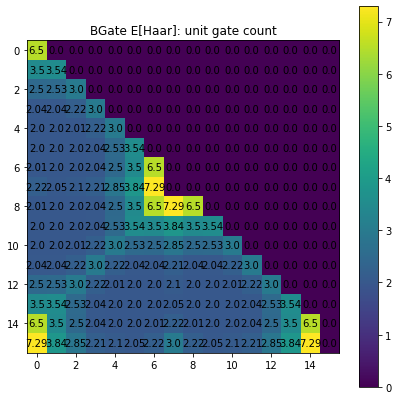

In [11]:
from src.utils.visualize import plotHamiltonianSweep
plotHamiltonianSweep(np.matrix(data), title="BGate E[Haar]: unit gate count", labels=labels, vmax=np.amax(data));

In [15]:
#zoom in on relevant area
#sweep parameters of B gate with t=1 to see how expected haar changes
from src.utils.custom_gates import CustomCostGate
from src.hamiltonian import ConversionGainHamiltonian
from src.utils.polytope_wrap import gate_set_to_haar_expectation
from src.basis import MixedOrderBasisCircuitTemplate
from src.utils.polytope_wrap import coverage_to_haar_expectation

h = ConversionGainHamiltonian()
data = []
labels = []

n_gc = 16
n_gg = 16

for i in range(0,7):
    temp_data = []
    temp_labels = []
    for j in range(0,7):
            
        temp_labels.append((f"gc={i}pi/{n_gc}", f"gg={j}pi/{n_gg}"))
        logging.info(temp_labels[-1])

        if i < j: #we might use this depending on whether the results are symmetric
            temp_data.append(0)
            continue

        cost = sum([i*np.pi/n_gc, j*np.pi/n_gg])/SPEED_LIMIT
        u = h._construct_U_lambda(i*np.pi/n_gc, j*np.pi/n_gg)(1).full()
        u = CustomCostGate(u, f"B({i*np.pi/n_gc, j*np.pi/n_gg})", cost=1) #cost=cost
        basis_gates = [u]# ,gate3]  
        basis = MixedOrderBasisCircuitTemplate(base_gates=basis_gates, chatty_build=False)
        result = coverage_to_haar_expectation(basis.coverage)
        #result = gate_set_to_haar_expectation([u], chatty=False)
        temp_data.append(result)
        
    labels.append(temp_labels)
    data.append(temp_data) 

INFO:root:('gc=0pi/16', 'gg=0pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.0, 0.0))


INFO:root:Haar-expectation cost: 0.0
INFO:root:('gc=0pi/16', 'gg=1pi/16')
INFO:root:('gc=0pi/16', 'gg=2pi/16')
INFO:root:('gc=0pi/16', 'gg=3pi/16')
INFO:root:('gc=0pi/16', 'gg=4pi/16')
INFO:root:('gc=0pi/16', 'gg=5pi/16')
INFO:root:('gc=0pi/16', 'gg=6pi/16')
INFO:root:('gc=1pi/16', 'gg=0pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.19634954084936207, 0.0))
0.00002	 | B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0))
0.00088	 | B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0))
0.00875	 | B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0))
0.04420	 | B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0))
0.13925	 | B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0))
0.30186	 | B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0)).B((0.19634954084936207, 0.0))
0.46492	 | B((0.19634954084936207, 0.0)).B((0.1

INFO:root:Haar-expectation cost: 7.291939177112498
INFO:root:('gc=1pi/16', 'gg=1pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.19634954084936207, 0.19634954084936207))
0.00000	 | B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207))
0.00419	 | B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207))
0.03593	 | B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207))
0.15041	 | B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207))
0.30947	 | B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 0.19634954084936207)).B((0.19634954084936207, 

INFO:root:Haar-expectation cost: 6.500137765307217
INFO:root:('gc=1pi/16', 'gg=2pi/16')
INFO:root:('gc=1pi/16', 'gg=3pi/16')
INFO:root:('gc=1pi/16', 'gg=4pi/16')
INFO:root:('gc=1pi/16', 'gg=5pi/16')
INFO:root:('gc=1pi/16', 'gg=6pi/16')
INFO:root:('gc=2pi/16', 'gg=0pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.39269908169872414, 0.0))
0.00757	 | B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0))
0.18553	 | B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0))
0.76678	 | B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0))
0.03998	 | B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0))
0.00014	 | B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0))


INFO:root:Haar-expectation cost: 3.8395746639269435
INFO:root:('gc=2pi/16', 'gg=1pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.39269908169872414, 0.19634954084936207))
0.03746	 | B((0.39269908169872414, 0.19634954084936207)).B((0.39269908169872414, 0.19634954084936207))
0.46254	 | B((0.39269908169872414, 0.19634954084936207)).B((0.39269908169872414, 0.19634954084936207)).B((0.39269908169872414, 0.19634954084936207))
0.45988	 | B((0.39269908169872414, 0.19634954084936207)).B((0.39269908169872414, 0.19634954084936207)).B((0.39269908169872414, 0.19634954084936207)).B((0.39269908169872414, 0.19634954084936207))
0.03998	 | B((0.39269908169872414, 0.19634954084936207)).B((0.39269908169872414, 0.19634954084936207)).B((0.39269908169872414, 0.19634954084936207)).B((0.39269908169872414, 0.19634954084936207)).B((0.39269908169872414, 0.19634954084936207))
0.00014	 | B((0.39269908169872414, 0.19634954084936207)).B((0.39269908169872414, 0.19634954084936207)).B((0.39269908169872414, 0.19634954084936207)).B((0.39269908169872414, 0.19634954084936207)).B((0.39269908169872414, 

INFO:root:Haar-expectation cost: 3.502799156321846
INFO:root:('gc=2pi/16', 'gg=2pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.39269908169872414, 0.39269908169872414))
0.00000	 | B((0.39269908169872414, 0.39269908169872414)).B((0.39269908169872414, 0.39269908169872414))
0.50000	 | B((0.39269908169872414, 0.39269908169872414)).B((0.39269908169872414, 0.39269908169872414)).B((0.39269908169872414, 0.39269908169872414))
0.45988	 | B((0.39269908169872414, 0.39269908169872414)).B((0.39269908169872414, 0.39269908169872414)).B((0.39269908169872414, 0.39269908169872414)).B((0.39269908169872414, 0.39269908169872414))
0.03998	 | B((0.39269908169872414, 0.39269908169872414)).B((0.39269908169872414, 0.39269908169872414)).B((0.39269908169872414, 0.39269908169872414)).B((0.39269908169872414, 0.39269908169872414)).B((0.39269908169872414, 0.39269908169872414))
0.00014	 | B((0.39269908169872414, 0.39269908169872414)).B((0.39269908169872414, 0.39269908169872414)).B((0.39269908169872414, 0.39269908169872414)).B((0.39269908169872414, 0.39269908169872414)).B((0.39269908169872414, 

INFO:root:Haar-expectation cost: 3.540254820808027
INFO:root:('gc=2pi/16', 'gg=3pi/16')
INFO:root:('gc=2pi/16', 'gg=4pi/16')
INFO:root:('gc=2pi/16', 'gg=5pi/16')
INFO:root:('gc=2pi/16', 'gg=6pi/16')
INFO:root:('gc=3pi/16', 'gg=0pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.5890486225480862, 0.0))
0.15417	 | B((0.5890486225480862, 0.0)).B((0.5890486225480862, 0.0))
0.84164	 | B((0.5890486225480862, 0.0)).B((0.5890486225480862, 0.0)).B((0.5890486225480862, 0.0))
0.00419	 | B((0.5890486225480862, 0.0)).B((0.5890486225480862, 0.0)).B((0.5890486225480862, 0.0)).B((0.5890486225480862, 0.0))


INFO:root:Haar-expectation cost: 2.850019528561617
INFO:root:('gc=3pi/16', 'gg=1pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.5890486225480862, 0.19634954084936207))
0.50000	 | B((0.5890486225480862, 0.19634954084936207)).B((0.5890486225480862, 0.19634954084936207))
0.49581	 | B((0.5890486225480862, 0.19634954084936207)).B((0.5890486225480862, 0.19634954084936207)).B((0.5890486225480862, 0.19634954084936207))
0.00419	 | B((0.5890486225480862, 0.19634954084936207)).B((0.5890486225480862, 0.19634954084936207)).B((0.5890486225480862, 0.19634954084936207)).B((0.5890486225480862, 0.19634954084936207))


INFO:root:Haar-expectation cost: 2.504189565718911
INFO:root:('gc=3pi/16', 'gg=2pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.5890486225480862, 0.39269908169872414))
0.47860	 | B((0.5890486225480862, 0.39269908169872414)).B((0.5890486225480862, 0.39269908169872414))
0.51721	 | B((0.5890486225480862, 0.39269908169872414)).B((0.5890486225480862, 0.39269908169872414)).B((0.5890486225480862, 0.39269908169872414))
0.00419	 | B((0.5890486225480862, 0.39269908169872414)).B((0.5890486225480862, 0.39269908169872414)).B((0.5890486225480862, 0.39269908169872414)).B((0.5890486225480862, 0.39269908169872414))


INFO:root:Haar-expectation cost: 2.5255935278542765
INFO:root:('gc=3pi/16', 'gg=3pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.5890486225480862, 0.5890486225480862))
0.00000	 | B((0.5890486225480862, 0.5890486225480862)).B((0.5890486225480862, 0.5890486225480862))
0.99581	 | B((0.5890486225480862, 0.5890486225480862)).B((0.5890486225480862, 0.5890486225480862)).B((0.5890486225480862, 0.5890486225480862))
0.00419	 | B((0.5890486225480862, 0.5890486225480862)).B((0.5890486225480862, 0.5890486225480862)).B((0.5890486225480862, 0.5890486225480862)).B((0.5890486225480862, 0.5890486225480862))


INFO:root:Haar-expectation cost: 3.0041895657189084
INFO:root:('gc=3pi/16', 'gg=4pi/16')
INFO:root:('gc=3pi/16', 'gg=5pi/16')
INFO:root:('gc=3pi/16', 'gg=6pi/16')
INFO:root:('gc=4pi/16', 'gg=0pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.7853981633974483, 0.0))
0.79012	 | B((0.7853981633974483, 0.0)).B((0.7853981633974483, 0.0))
0.20988	 | B((0.7853981633974483, 0.0)).B((0.7853981633974483, 0.0)).B((0.7853981633974483, 0.0))


INFO:root:Haar-expectation cost: 2.2098826363156774
INFO:root:('gc=4pi/16', 'gg=1pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.7853981633974483, 0.19634954084936207))
0.95983	 | B((0.7853981633974483, 0.19634954084936207)).B((0.7853981633974483, 0.19634954084936207))
0.04017	 | B((0.7853981633974483, 0.19634954084936207)).B((0.7853981633974483, 0.19634954084936207)).B((0.7853981633974483, 0.19634954084936207))


INFO:root:Haar-expectation cost: 2.04017235274205
INFO:root:('gc=4pi/16', 'gg=2pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.7853981633974483, 0.39269908169872414))
0.95827	 | B((0.7853981633974483, 0.39269908169872414)).B((0.7853981633974483, 0.39269908169872414))
0.04173	 | B((0.7853981633974483, 0.39269908169872414)).B((0.7853981633974483, 0.39269908169872414)).B((0.7853981633974483, 0.39269908169872414))


INFO:root:Haar-expectation cost: 2.041729136984175
INFO:root:('gc=4pi/16', 'gg=3pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.7853981633974483, 0.5890486225480862))
0.78285	 | B((0.7853981633974483, 0.5890486225480862)).B((0.7853981633974483, 0.5890486225480862))
0.21715	 | B((0.7853981633974483, 0.5890486225480862)).B((0.7853981633974483, 0.5890486225480862)).B((0.7853981633974483, 0.5890486225480862))


INFO:root:Haar-expectation cost: 2.217148790419858
INFO:root:('gc=4pi/16', 'gg=4pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.7853981633974483, 0.7853981633974483))
0.00000	 | B((0.7853981633974483, 0.7853981633974483)).B((0.7853981633974483, 0.7853981633974483))
1.00000	 | B((0.7853981633974483, 0.7853981633974483)).B((0.7853981633974483, 0.7853981633974483)).B((0.7853981633974483, 0.7853981633974483))


INFO:root:Haar-expectation cost: 3.000000000000001
INFO:root:('gc=4pi/16', 'gg=5pi/16')
INFO:root:('gc=4pi/16', 'gg=6pi/16')
INFO:root:('gc=5pi/16', 'gg=0pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.9817477042468103, 0.0))
0.89957	 | B((0.9817477042468103, 0.0)).B((0.9817477042468103, 0.0))
0.10043	 | B((0.9817477042468103, 0.0)).B((0.9817477042468103, 0.0)).B((0.9817477042468103, 0.0))


INFO:root:Haar-expectation cost: 2.100434417748742
INFO:root:('gc=5pi/16', 'gg=1pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.9817477042468103, 0.19634954084936207))
0.99882	 | B((0.9817477042468103, 0.19634954084936207)).B((0.9817477042468103, 0.19634954084936207))
0.00118	 | B((0.9817477042468103, 0.19634954084936207)).B((0.9817477042468103, 0.19634954084936207)).B((0.9817477042468103, 0.19634954084936207))


INFO:root:Haar-expectation cost: 2.0011770545216936
INFO:root:('gc=5pi/16', 'gg=2pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.9817477042468103, 0.39269908169872414))
0.99986	 | B((0.9817477042468103, 0.39269908169872414)).B((0.9817477042468103, 0.39269908169872414))
0.00014	 | B((0.9817477042468103, 0.39269908169872414)).B((0.9817477042468103, 0.39269908169872414)).B((0.9817477042468103, 0.39269908169872414))


INFO:root:Haar-expectation cost: 2.0001430172601995
INFO:root:('gc=5pi/16', 'gg=3pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.9817477042468103, 0.5890486225480862))
0.98873	 | B((0.9817477042468103, 0.5890486225480862)).B((0.9817477042468103, 0.5890486225480862))
0.01127	 | B((0.9817477042468103, 0.5890486225480862)).B((0.9817477042468103, 0.5890486225480862)).B((0.9817477042468103, 0.5890486225480862))


INFO:root:Haar-expectation cost: 2.011267585362158
INFO:root:('gc=5pi/16', 'gg=4pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.9817477042468103, 0.7853981633974483))
0.78285	 | B((0.9817477042468103, 0.7853981633974483)).B((0.9817477042468103, 0.7853981633974483))
0.21715	 | B((0.9817477042468103, 0.7853981633974483)).B((0.9817477042468103, 0.7853981633974483)).B((0.9817477042468103, 0.7853981633974483))


INFO:root:Haar-expectation cost: 2.217148790419858
INFO:root:('gc=5pi/16', 'gg=5pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.9817477042468103, 0.9817477042468103))
0.00000	 | B((0.9817477042468103, 0.9817477042468103)).B((0.9817477042468103, 0.9817477042468103))
0.99581	 | B((0.9817477042468103, 0.9817477042468103)).B((0.9817477042468103, 0.9817477042468103)).B((0.9817477042468103, 0.9817477042468103))
0.00419	 | B((0.9817477042468103, 0.9817477042468103)).B((0.9817477042468103, 0.9817477042468103)).B((0.9817477042468103, 0.9817477042468103)).B((0.9817477042468103, 0.9817477042468103))


INFO:root:Haar-expectation cost: 3.0041895657189084
INFO:root:('gc=5pi/16', 'gg=6pi/16')
INFO:root:('gc=6pi/16', 'gg=0pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((1.1780972450961724, 0.0))
0.95458	 | B((1.1780972450961724, 0.0)).B((1.1780972450961724, 0.0))
0.04542	 | B((1.1780972450961724, 0.0)).B((1.1780972450961724, 0.0)).B((1.1780972450961724, 0.0))


INFO:root:Haar-expectation cost: 2.0454225284540533
INFO:root:('gc=6pi/16', 'gg=1pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((1.1780972450961724, 0.19634954084936207))
0.99986	 | B((1.1780972450961724, 0.19634954084936207)).B((1.1780972450961724, 0.19634954084936207))
0.00014	 | B((1.1780972450961724, 0.19634954084936207)).B((1.1780972450961724, 0.19634954084936207)).B((1.1780972450961724, 0.19634954084936207))


INFO:root:Haar-expectation cost: 2.000143017260201
INFO:root:('gc=6pi/16', 'gg=2pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((1.1780972450961724, 0.39269908169872414))
1.00000	 | B((1.1780972450961724, 0.39269908169872414)).B((1.1780972450961724, 0.39269908169872414))


INFO:root:Haar-expectation cost: 2.0
INFO:root:('gc=6pi/16', 'gg=3pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((1.1780972450961724, 0.5890486225480862))
0.99986	 | B((1.1780972450961724, 0.5890486225480862)).B((1.1780972450961724, 0.5890486225480862))
0.00014	 | B((1.1780972450961724, 0.5890486225480862)).B((1.1780972450961724, 0.5890486225480862)).B((1.1780972450961724, 0.5890486225480862))


INFO:root:Haar-expectation cost: 2.0001430172602
INFO:root:('gc=6pi/16', 'gg=4pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((1.1780972450961724, 0.7853981633974483))
0.95827	 | B((1.1780972450961724, 0.7853981633974483)).B((1.1780972450961724, 0.7853981633974483))
0.04173	 | B((1.1780972450961724, 0.7853981633974483)).B((1.1780972450961724, 0.7853981633974483)).B((1.1780972450961724, 0.7853981633974483))


INFO:root:Haar-expectation cost: 2.041729136984175
INFO:root:('gc=6pi/16', 'gg=5pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((1.1780972450961724, 0.9817477042468103))
0.47860	 | B((1.1780972450961724, 0.9817477042468103)).B((1.1780972450961724, 0.9817477042468103))
0.51721	 | B((1.1780972450961724, 0.9817477042468103)).B((1.1780972450961724, 0.9817477042468103)).B((1.1780972450961724, 0.9817477042468103))
0.00419	 | B((1.1780972450961724, 0.9817477042468103)).B((1.1780972450961724, 0.9817477042468103)).B((1.1780972450961724, 0.9817477042468103)).B((1.1780972450961724, 0.9817477042468103))


INFO:root:Haar-expectation cost: 2.5255935278542765
INFO:root:('gc=6pi/16', 'gg=6pi/16')
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((1.1780972450961724, 1.1780972450961724))
0.00000	 | B((1.1780972450961724, 1.1780972450961724)).B((1.1780972450961724, 1.1780972450961724))
0.50000	 | B((1.1780972450961724, 1.1780972450961724)).B((1.1780972450961724, 1.1780972450961724)).B((1.1780972450961724, 1.1780972450961724))
0.45988	 | B((1.1780972450961724, 1.1780972450961724)).B((1.1780972450961724, 1.1780972450961724)).B((1.1780972450961724, 1.1780972450961724)).B((1.1780972450961724, 1.1780972450961724))
0.03998	 | B((1.1780972450961724, 1.1780972450961724)).B((1.1780972450961724, 1.1780972450961724)).B((1.1780972450961724, 1.1780972450961724)).B((1.1780972450961724, 1.1780972450961724)).B((1.1780972450961724, 1.1780972450961724))
0.00014	 | B((1.1780972450961724, 1.1780972450961724)).B((1.1780972450961724, 1.1780972450961724)).B((1.1780972450961724, 1.1780972450961724)).B((1.1780972450961724, 1.1780972450961724)).B((1.1780972450961724, 1.1780972450961724)).B((1.1780972450961

INFO:root:Haar-expectation cost: 3.540254820808025


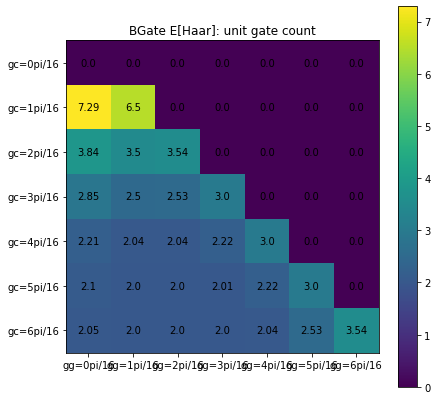

In [16]:
from src.utils.visualize import plotHamiltonianSweep
plotHamiltonianSweep(np.matrix(data), title="BGate E[Haar]: unit gate count", labels=labels, vmax=np.amax(data));

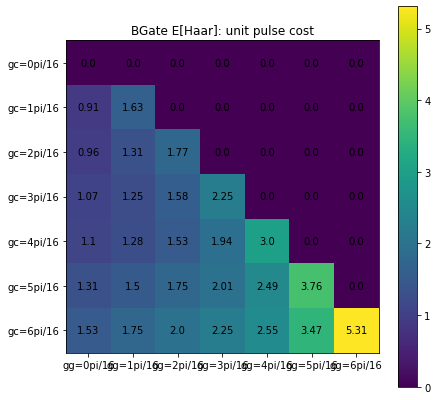

In [19]:
#apply cost function,
#for single gate basis we can just use multplication instead of recalcing

# cost = (sum([i*np.pi/n_gc, j*np.pi/n_gg]))**2/(SPEED_LIMIT)**2 #current -> power
# cost = sum([i*np.pi/n_gc, j*np.pi/n_gg])/SPEED_LIMIT #linear power

cost_data = []
for i in range(0,7):
    temp_data = []
    for j in range(0,7):
        cost = sum([i*np.pi/n_gc, j*np.pi/n_gg])/SPEED_LIMIT
        temp_data.append(data[i][j] * cost)  
    cost_data.append(temp_data) 
plotHamiltonianSweep(np.matrix(cost_data), title="BGate E[Haar]: unit pulse cost", labels=labels, vmax=np.amax(cost_data));

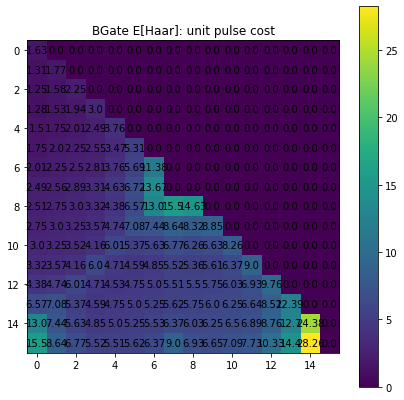

In [13]:
#apply cost function,
#for single gate basis we can just use multplication instead of recalcing

#here we are defining cost as pulse duration using speed limit
#using knowledge that power (g_total) and duration are inversely proportional
#we know that if we define a speed limit (maximum viable g_total)
#then the pulse duration of any gate becomes the ratio of its g_total/speed_limit
#in other words, if a gate has half power of speedlimit, we can reduce time by half

#NOTE suggestion from michael, says g actually proportional to current, 
# chao says use current but speedlimit proportional to current (not power)
# so square these terms to make proportional to power
# need to investigate further
# cost = (sum([i*np.pi/n_gc, j*np.pi/n_gg]))**2/(SPEED_LIMIT)**2 #current -> power
# cost = sum([i*np.pi/n_gc, j*np.pi/n_gg])/SPEED_LIMIT #linear power

# how do we model this, resistive loads in series/parallel

n_gc=16
n_gg=16
cost_data = []
for i in range(1,n_gc+1):
    temp_data = []
    for j in range(1,n_gg+1):
        cost = sum([i*np.pi/n_gc, j*np.pi/n_gg])/SPEED_LIMIT
        temp_data.append(data[i-1][j-1] * cost)  
    cost_data.append(temp_data) 
plotHamiltonianSweep(np.matrix(cost_data), title="BGate E[Haar]: unit pulse cost", labels=labels, vmax=np.amax(cost_data));

In [ ]:
from src.basis import CustomCostCircuitTemplate
from src.utils.custom_gates import CustomCostGate
from src.hamiltonian import SnailEffectiveHamiltonian
from src.utils.polytope_wrap import gate_set_to_coverage
import numpy as np
h = SnailEffectiveHamiltonian()
i,j = (2,1)
u = h._construct_U_lambda(i*np.pi/8, j*np.pi/8)(1).full()
u = CustomCostGate(u, f"B({i*np.pi/8, j*np.pi/8})", cost=sum([i*np.pi/8, j*np.pi/8])/SPEED_LIMIT)

i,j = (3,1)
u2 = h._construct_U_lambda(i*np.pi/8, j*np.pi/8)(1).full()
u2 = CustomCostGate(u, f"B({i*np.pi/8, j*np.pi/8})", cost=sum([i*np.pi/8, j*np.pi/8])/SPEED_LIMIT)

basis = CustomCostCircuitTemplate(base_gates=[u, u2])